In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv(r"C:\Users\DIU\Desktop\sonar.all-data.csv")

In [3]:
dataset.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [4]:
dataset.shape

(207, 61)

In [5]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1:]

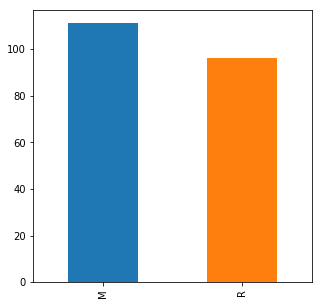

In [6]:
dataset["R"].value_counts().sort_index().plot.bar(figsize=(5,5))

In [7]:
# one hot encoding
y = pd.get_dummies(y)

In [8]:
y.head()

,R_M,R_R
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [9]:
X, y = shuffle(X,y, random_state=1)

In [10]:
print (X.head())
print (y.head())

     0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
186  0.0368  0.0279  0.0103  0.0566  0.0759  0.0679  0.0970  0.1473  0.2164   
155  0.0047  0.0059  0.0080  0.0554  0.0883  0.1278  0.1674  0.1373  0.2922   
165  0.0411  0.0277  0.0604  0.0525  0.0489  0.0385  0.0611  0.1117  0.1237   
200  0.0335  0.0258  0.0398  0.0570  0.0529  0.1091  0.1709  0.1684  0.1865   
58   0.0125  0.0152  0.0218  0.0175  0.0362  0.0696  0.0873  0.0616  0.1252   

     0.2111   ...    0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  \
186  0.2544   ...    0.0151  0.0105  0.0024  0.0018  0.0057  0.0092  0.0009   
155  0.3469   ...    0.0129  0.0095  0.0126  0.0069  0.0039  0.0068  0.0060   
165  0.2300   ...    0.0181  0.0217  0.0038  0.0019  0.0065  0.0132  0.0108   
200  0.2660   ...    0.0130  0.0120  0.0039  0.0053  0.0062  0.0046  0.0045   
58   0.1302   ...    0.0019  0.0041  0.0074  0.0030  0.0050  0.0048  0.0017   

     0.0084  0.0090  0.0032  
186  0.0086  0.0110 

In [11]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=0)

In [12]:
learning_rate = 0.3
trainning_epochs = 1000  # epoch means number of iteration
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]

In [13]:
# we have only two classes
# 1. Mine
# 2. Rock
# model_path store the location where we save the model

n_class = 2
#model_path = "../working"

In [14]:
# hidden layers
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [15]:
x = tf.placeholder(tf.float32, [None, n_dim])
w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros(n_class))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [16]:
# defining the weights and biases for each layer

weights = {
    "h1" : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    "h2" : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    "h3" : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    "h4" : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    "out" : tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
    "b1" :  tf.Variable(tf.truncated_normal([n_hidden_1])),
    "b2" :  tf.Variable(tf.truncated_normal([n_hidden_2])),
    "b3" :  tf.Variable(tf.truncated_normal([n_hidden_3])),
    "b4" :  tf.Variable(tf.truncated_normal([n_hidden_4])),
    "out" :  tf.Variable(tf.truncated_normal([n_class]))
}

In [17]:
# defining Multilayer Perceptron
def multilayer_perceptron(x, weights, biases):
    
    # hidden layer with "relu" activation
    layer_1 = tf.add(tf.matmul(x, weights["h1"]), biases["b1"])
    layer_1 = tf.nn.relu(layer_1)
    
    # hidden layer with "sigmoid" activation
    layer_2 = tf.add(tf.matmul(layer_1, weights["h2"]), biases["b2"])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # hidden layer with "sigmoid" activation
    layer_3 = tf.add(tf.matmul(layer_2, weights["h3"]), biases["b3"])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    # hidden layer with "relu" activation
    layer_4 = tf.add(tf.matmul(layer_3, weights["h4"]), biases["b4"])
    layer_4 = tf.nn.relu(layer_4)
    
    out_layer = tf.matmul(layer_4, weights["out"]) + biases["out"]
    
    return out_layer

In [18]:
# initialize all the variables
init = tf.global_variables_initializer()

In [19]:
saver = tf.train.Saver()

In [20]:
y = multilayer_perceptron(x, weights, biases)

In [21]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y , labels = y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [22]:
sess = tf.Session()
sess.run(init)

In [23]:
mse_history = []
accuracy_history = []

In [24]:
for epoch in range(trainning_epochs):
    sess.run(training_step, feed_dict= {x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict = {x: train_x, y_:train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # print("Accuracy: ", (sess.run(accuracy, feed_dict = {x: X_test, y_: y_test})))
    pred_y = sess.run(y, feed_dict={x : test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict = {x : train_x, y_: train_y}))
    accuracy_history.append(accuracy)
    
    print ("epoch: ", epoch, "- cost: ", cost, "- MSE: ", mse_, "- Training Accuracy: ", accuracy)

epoch:  0 - cost:  109.10581 - MSE:  14937.917 - Training Accuracy:  0.55151516
epoch:  1 - cost:  8.670871 - MSE:  137.59373 - Training Accuracy:  0.44848484
epoch:  2 - cost:  8.498561 - MSE:  117.50857 - Training Accuracy:  0.55151516
epoch:  3 - cost:  1.6793629 - MSE:  2.759407 - Training Accuracy:  0.44848484
epoch:  4 - cost:  1.2960038 - MSE:  3.6148188 - Training Accuracy:  0.54545456
epoch:  5 - cost:  0.9358297 - MSE:  1.0982329 - Training Accuracy:  0.44848484
epoch:  6 - cost:  0.828158 - MSE:  0.9121497 - Training Accuracy:  0.44848484
epoch:  7 - cost:  0.7487885 - MSE:  0.6162881 - Training Accuracy:  0.46666667
epoch:  8 - cost:  0.70069 - MSE:  0.46754557 - Training Accuracy:  0.5030303
epoch:  9 - cost:  0.68871737 - MSE:  0.46104935 - Training Accuracy:  0.5151515
epoch:  10 - cost:  0.6813391 - MSE:  0.4635775 - Training Accuracy:  0.55757576
epoch:  11 - cost:  0.6724029 - MSE:  0.4645096 - Training Accuracy:  0.58181816
epoch:  12 - cost:  0.66447395 - MSE:  0.46

epoch:  102 - cost:  0.4730393 - MSE:  2.1791034 - Training Accuracy:  0.8
epoch:  103 - cost:  0.4567809 - MSE:  2.3659823 - Training Accuracy:  0.76363635
epoch:  104 - cost:  0.52831495 - MSE:  2.1706867 - Training Accuracy:  0.73333335
epoch:  105 - cost:  0.4182306 - MSE:  2.679187 - Training Accuracy:  0.8242424
epoch:  106 - cost:  0.42994976 - MSE:  1.6400784 - Training Accuracy:  0.8424242
epoch:  107 - cost:  0.4901197 - MSE:  3.0248692 - Training Accuracy:  0.6969697
epoch:  108 - cost:  0.70882523 - MSE:  1.2319785 - Training Accuracy:  0.5151515
epoch:  109 - cost:  0.45836663 - MSE:  2.390739 - Training Accuracy:  0.8121212
epoch:  110 - cost:  0.40805045 - MSE:  2.2478104 - Training Accuracy:  0.830303
epoch:  111 - cost:  0.43667445 - MSE:  2.1116507 - Training Accuracy:  0.8181818
epoch:  112 - cost:  0.4275085 - MSE:  2.4590135 - Training Accuracy:  0.76363635
epoch:  113 - cost:  0.57780766 - MSE:  1.7414526 - Training Accuracy:  0.6787879
epoch:  114 - cost:  0.4501

epoch:  204 - cost:  0.581637 - MSE:  1.2511805 - Training Accuracy:  0.6424242
epoch:  205 - cost:  0.57613945 - MSE:  1.2512406 - Training Accuracy:  0.6545454
epoch:  206 - cost:  0.5700628 - MSE:  1.3134936 - Training Accuracy:  0.6787879
epoch:  207 - cost:  0.56450105 - MSE:  1.3555769 - Training Accuracy:  0.6848485
epoch:  208 - cost:  0.5584886 - MSE:  1.4269412 - Training Accuracy:  0.7151515
epoch:  209 - cost:  0.5510118 - MSE:  1.4383082 - Training Accuracy:  0.72727275
epoch:  210 - cost:  0.54448855 - MSE:  1.5297608 - Training Accuracy:  0.72727275
epoch:  211 - cost:  0.53700113 - MSE:  1.5694951 - Training Accuracy:  0.73939395
epoch:  212 - cost:  0.5283602 - MSE:  1.6281422 - Training Accuracy:  0.75151515
epoch:  213 - cost:  0.51848763 - MSE:  1.7203043 - Training Accuracy:  0.75757575
epoch:  214 - cost:  0.50763834 - MSE:  1.8226482 - Training Accuracy:  0.76969695
epoch:  215 - cost:  0.4961506 - MSE:  1.9337733 - Training Accuracy:  0.7818182
epoch:  216 - cos

epoch:  305 - cost:  0.51285964 - MSE:  1.4212819 - Training Accuracy:  0.8060606
epoch:  306 - cost:  0.49015474 - MSE:  1.5812256 - Training Accuracy:  0.7151515
epoch:  307 - cost:  0.47343722 - MSE:  1.5361699 - Training Accuracy:  0.8727273
epoch:  308 - cost:  0.56340516 - MSE:  2.1349964 - Training Accuracy:  0.6121212
epoch:  309 - cost:  0.8755136 - MSE:  2.7351718 - Training Accuracy:  0.55757576
epoch:  310 - cost:  0.5544692 - MSE:  1.6355581 - Training Accuracy:  0.6242424
epoch:  311 - cost:  0.48912016 - MSE:  1.5131404 - Training Accuracy:  0.6484848
epoch:  312 - cost:  0.46262416 - MSE:  1.4624285 - Training Accuracy:  0.8181818
epoch:  313 - cost:  0.4347666 - MSE:  1.6682516 - Training Accuracy:  0.8363636
epoch:  314 - cost:  0.41205546 - MSE:  1.62539 - Training Accuracy:  0.90909094
epoch:  315 - cost:  0.39260805 - MSE:  1.8471326 - Training Accuracy:  0.8424242
epoch:  316 - cost:  0.42887124 - MSE:  1.9228688 - Training Accuracy:  0.8484849
epoch:  317 - cost:

epoch:  406 - cost:  0.22320133 - MSE:  4.4799523 - Training Accuracy:  0.8909091
epoch:  407 - cost:  0.29564118 - MSE:  5.3835945 - Training Accuracy:  0.8787879
epoch:  408 - cost:  0.34812042 - MSE:  5.3855214 - Training Accuracy:  0.8
epoch:  409 - cost:  0.24599285 - MSE:  4.81627 - Training Accuracy:  0.91515154
epoch:  410 - cost:  0.1983399 - MSE:  5.1525426 - Training Accuracy:  0.91515154
epoch:  411 - cost:  0.13628264 - MSE:  4.8368134 - Training Accuracy:  0.96363634
epoch:  412 - cost:  0.123701386 - MSE:  5.7493296 - Training Accuracy:  0.9757576
epoch:  413 - cost:  0.13124752 - MSE:  5.7283745 - Training Accuracy:  0.95757574
epoch:  414 - cost:  0.14284353 - MSE:  6.532368 - Training Accuracy:  0.95151514
epoch:  415 - cost:  0.21102738 - MSE:  6.678945 - Training Accuracy:  0.93333334
epoch:  416 - cost:  0.23997241 - MSE:  7.4170017 - Training Accuracy:  0.8666667
epoch:  417 - cost:  0.2679248 - MSE:  7.43597 - Training Accuracy:  0.8969697
epoch:  418 - cost:  0.

epoch:  507 - cost:  0.3752776 - MSE:  4.4382896 - Training Accuracy:  0.8181818
epoch:  508 - cost:  1.2611595 - MSE:  6.1005583 - Training Accuracy:  0.55151516
epoch:  509 - cost:  1.5176249 - MSE:  11.712259 - Training Accuracy:  0.44848484
epoch:  510 - cost:  0.6520193 - MSE:  1.6983008 - Training Accuracy:  0.55757576
epoch:  511 - cost:  0.6340969 - MSE:  1.7334644 - Training Accuracy:  0.6606061
epoch:  512 - cost:  0.6131902 - MSE:  1.7995384 - Training Accuracy:  0.73333335
epoch:  513 - cost:  0.5815715 - MSE:  1.8191907 - Training Accuracy:  0.8545455
epoch:  514 - cost:  0.5396683 - MSE:  1.9068676 - Training Accuracy:  0.830303
epoch:  515 - cost:  0.5086214 - MSE:  1.94535 - Training Accuracy:  0.7878788
epoch:  516 - cost:  0.48463124 - MSE:  2.0925899 - Training Accuracy:  0.7878788
epoch:  517 - cost:  0.45995232 - MSE:  2.3470912 - Training Accuracy:  0.8484849
epoch:  518 - cost:  0.42958498 - MSE:  2.355177 - Training Accuracy:  0.8909091
epoch:  519 - cost:  0.38

epoch:  608 - cost:  0.7143897 - MSE:  2.581943 - Training Accuracy:  0.6787879
epoch:  609 - cost:  1.5689633 - MSE:  9.059692 - Training Accuracy:  0.57575756
epoch:  610 - cost:  0.6151422 - MSE:  2.0952356 - Training Accuracy:  0.55757576
epoch:  611 - cost:  0.58337146 - MSE:  2.3505833 - Training Accuracy:  0.58181816
epoch:  612 - cost:  0.5504625 - MSE:  2.4510732 - Training Accuracy:  0.5939394
epoch:  613 - cost:  0.51078165 - MSE:  2.9329865 - Training Accuracy:  0.58181816
epoch:  614 - cost:  0.47556475 - MSE:  2.8980727 - Training Accuracy:  0.6060606
epoch:  615 - cost:  0.43912816 - MSE:  3.203532 - Training Accuracy:  0.6242424
epoch:  616 - cost:  0.40723455 - MSE:  3.267424 - Training Accuracy:  0.7151515
epoch:  617 - cost:  0.37833983 - MSE:  3.4783401 - Training Accuracy:  0.8909091
epoch:  618 - cost:  0.34961024 - MSE:  3.7986934 - Training Accuracy:  0.95151514
epoch:  619 - cost:  0.31172907 - MSE:  4.642242 - Training Accuracy:  0.96363634
epoch:  620 - cost:

epoch:  709 - cost:  0.033590246 - MSE:  18.815247 - Training Accuracy:  1.0
epoch:  710 - cost:  0.031201856 - MSE:  19.659641 - Training Accuracy:  1.0
epoch:  711 - cost:  0.02927168 - MSE:  20.285685 - Training Accuracy:  1.0
epoch:  712 - cost:  0.027643554 - MSE:  20.922628 - Training Accuracy:  1.0
epoch:  713 - cost:  0.026279092 - MSE:  21.376999 - Training Accuracy:  1.0
epoch:  714 - cost:  0.025079325 - MSE:  21.93322 - Training Accuracy:  1.0
epoch:  715 - cost:  0.024038991 - MSE:  22.350168 - Training Accuracy:  1.0
epoch:  716 - cost:  0.023131963 - MSE:  22.774431 - Training Accuracy:  1.0
epoch:  717 - cost:  0.02230466 - MSE:  23.112371 - Training Accuracy:  1.0
epoch:  718 - cost:  0.02155976 - MSE:  23.447641 - Training Accuracy:  1.0
epoch:  719 - cost:  0.020875366 - MSE:  23.736103 - Training Accuracy:  1.0
epoch:  720 - cost:  0.020237954 - MSE:  24.059488 - Training Accuracy:  1.0
epoch:  721 - cost:  0.019647453 - MSE:  24.32764 - Training Accuracy:  1.0
epoc

epoch:  816 - cost:  0.005050363 - MSE:  32.907345 - Training Accuracy:  1.0
epoch:  817 - cost:  0.0050077275 - MSE:  32.945637 - Training Accuracy:  1.0
epoch:  818 - cost:  0.0049653226 - MSE:  32.9709 - Training Accuracy:  1.0
epoch:  819 - cost:  0.004924464 - MSE:  33.014454 - Training Accuracy:  1.0
epoch:  820 - cost:  0.0048832246 - MSE:  33.024258 - Training Accuracy:  1.0
epoch:  821 - cost:  0.0048432318 - MSE:  33.071186 - Training Accuracy:  1.0
epoch:  822 - cost:  0.004803594 - MSE:  33.092297 - Training Accuracy:  1.0
epoch:  823 - cost:  0.004765043 - MSE:  33.11289 - Training Accuracy:  1.0
epoch:  824 - cost:  0.0047263987 - MSE:  33.14949 - Training Accuracy:  1.0
epoch:  825 - cost:  0.0046892874 - MSE:  33.174675 - Training Accuracy:  1.0
epoch:  826 - cost:  0.004651833 - MSE:  33.217937 - Training Accuracy:  1.0
epoch:  827 - cost:  0.004615315 - MSE:  33.237762 - Training Accuracy:  1.0
epoch:  828 - cost:  0.0045796214 - MSE:  33.27476 - Training Accuracy:  1

epoch:  923 - cost:  0.002592944 - MSE:  35.320244 - Training Accuracy:  1.0
epoch:  924 - cost:  0.0025807454 - MSE:  35.333054 - Training Accuracy:  1.0
epoch:  925 - cost:  0.0025685667 - MSE:  35.349503 - Training Accuracy:  1.0
epoch:  926 - cost:  0.0025566902 - MSE:  35.37263 - Training Accuracy:  1.0
epoch:  927 - cost:  0.0025446059 - MSE:  35.38697 - Training Accuracy:  1.0
epoch:  928 - cost:  0.0025329448 - MSE:  35.40174 - Training Accuracy:  1.0
epoch:  929 - cost:  0.002521164 - MSE:  35.424652 - Training Accuracy:  1.0
epoch:  930 - cost:  0.0025095677 - MSE:  35.439682 - Training Accuracy:  1.0
epoch:  931 - cost:  0.0024981098 - MSE:  35.453163 - Training Accuracy:  1.0
epoch:  932 - cost:  0.002486665 - MSE:  35.47795 - Training Accuracy:  1.0
epoch:  933 - cost:  0.00247519 - MSE:  35.490974 - Training Accuracy:  1.0
epoch:  934 - cost:  0.002463896 - MSE:  35.507 - Training Accuracy:  1.0
epoch:  935 - cost:  0.002452679 - MSE:  35.530407 - Training Accuracy:  1.0


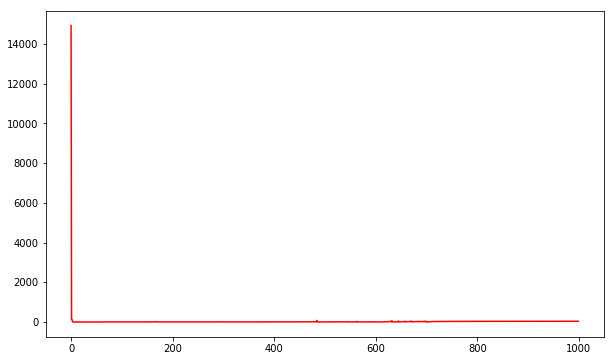

In [25]:
plt.subplots(figsize=(10, 6))
plt.plot(mse_history, 'r')
plt.show()

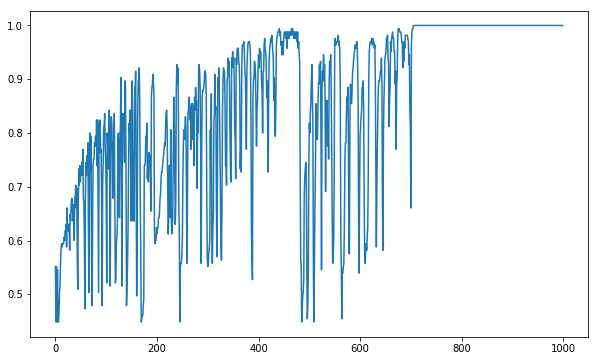

In [26]:
plt.subplots(figsize=(10, 6))
plt.plot(accuracy_history)
plt.show()

In [27]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Test accuracy : ", (sess.run(accuracy, feed_dict = {x: test_x, y_:test_y})))

Test accuracy :  0.8095238


In [28]:
pred_y = sess.run(y, feed_dict = {x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))

print("MSE[Mean Squared Error]: %.4f" % (sess.run(mse)))

MSE[Mean Squared Error]: 36.2065
